In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import linear_model
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
matplotlib.rcParams['axes.labelsize']=12
matplotlib.rcParams['xtick.labelsize']=10
matplotlib.rcParams['ytick.labelsize']=10
matplotlib.rcParams['text.color']='k'
matplotlib.rcParams['legend.fontsize']=6

In [2]:
#retrieving data
avg=pd.read_csv("cleaned_data.csv")

In [3]:
print('\n Data Types:')


 Data Types:


In [4]:
print(avg.dtypes)

Period                             object
Target Variable 1                 float64
Target Variable 2                 float64
Average TV                        float64
Inflation Rate                    float64
Oil production                    float64
Crude oil Prices                  float64
FEDERATION ACCOUNT                float64
MONEY SUPPLY                      float64
TREASURY BILLS RATE               float64
EXCHANGE RATE                     float64
POPULATION                        float64
PRIME LENDING RATE                float64
AVERAGE ELECTRICITY GENERATION    float64
FDI                               float64
dtype: object


In [5]:
dateparse=lambda Period: pd.datetime.strptime(Period, '%Y-%m-%d')

In [6]:
data=pd.read_csv("cleaned_data.csv", parse_dates=['Period'], index_col='Period', date_parser=dateparse)

In [7]:
data.index

DatetimeIndex(['2013-03-01', '2013-06-01', '2013-09-01', '2013-12-01',
               '2014-03-01', '2014-06-01', '2014-09-01', '2014-12-01',
               '2015-03-01', '2015-06-01', '2015-09-01', '2015-12-01',
               '2016-03-01', '2016-06-01', '2016-09-01', '2016-12-01',
               '2017-03-01', '2017-06-01', '2017-09-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Period', freq=None)

In [8]:
yinf=data['Inflation Rate']
yoil_prod=data['Oil production']
ycrude_oil=data['Crude oil Prices']
yfed_acc=data['FEDERATION ACCOUNT']
ymoney_supply=data['MONEY SUPPLY']
yt_bills=data['TREASURY BILLS RATE']
yxchange=data['EXCHANGE RATE']
ypop=data['POPULATION']
ylend=data['PRIME LENDING RATE']
yelect=data['AVERAGE ELECTRICITY GENERATION']
yfdi=data['FDI']

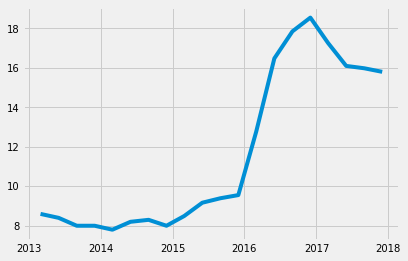

In [9]:
plt.plot(yinf)

In [10]:
#check for stationarity:
#constant ,ean
#constant variance
#an autocovariance tht does not depend on time
#using rolling statistics and dickey-fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller

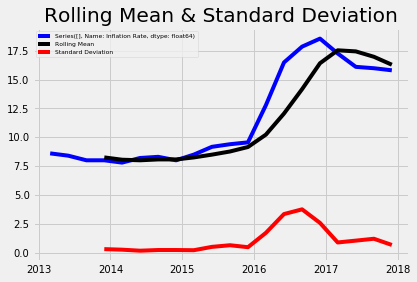

RESULT OF DICKEY-FULLER TEST:
Test Statistics          -1.392779
p-value                   0.585733
#Lag Used                 1.000000
No of Observation        18.000000
Critical Values (1%)     -3.859073
Critical Values (5%)     -3.042046
Critical Values (10%)    -2.660906
dtype: float64


In [11]:
def test_stationarity(timeseries):
    #Determining rolling statistics
    
    rolmean=timeseries.rolling(4).mean()
    rolstd=timeseries.rolling(4).std()
    
    
    #plot rolling statistics:
    orign=plt.plot(timeseries, color='blue', label= timeseries[:0])
    mean=plt.plot(rolmean, color='black', label='Rolling Mean')
    std=plt.plot(rolstd, color='red', label='Standard Deviation')
    plt.legend(loc='upper left')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
                  
                  
    #perform Dickey-Fuller Test
    print('RESULT OF DICKEY-FULLER TEST:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', '#Lag Used', 'No of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical Values (%s)' %key]=value
    print(dfoutput)
                  
test_stationarity(yinf)

In [12]:
#reason for non-stationarity:
#trend
#seasonality
#solution:  convert the forecasted values into the original scale by applying
#trend and seasonality constraints back by
#1. transform

data_log=np.log(data)

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
y=data_log.resample('Q').mean()

In [43]:
print(y)

            Target Variable 1  Target Variable 2  Average TV  Inflation Rate  \
Period                                                                         
2013-03-31          -4.128936          -1.832581   -2.429283        2.151762   
2013-06-30          -4.011843          -2.175072   -2.719617        2.128232   
2013-09-30          -2.417996          -2.197325   -2.301586        2.079442   
2013-12-31          -3.623092          -2.833613   -3.153556        2.079442   
2014-03-31          -5.184989          -1.832581   -2.491327        2.054124   
2014-06-30          -4.431217          -1.763755   -2.389233        2.104134   
2014-09-30          -1.432967          -0.832869   -1.088563        2.116256   
2014-12-31          -2.425883          -1.386294   -1.776674        2.079442   
2015-03-31          -5.221356          -1.558270   -2.225624        2.139313   
2015-06-30          -3.600869          -1.540378   -2.113619        2.215689   
2015-09-30          -3.589940          -

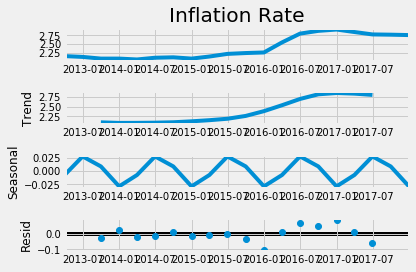

In [44]:
decomposition=sm.tsa.seasonal_decompose(y['Inflation Rate'], model='additive')
fig=decomposition.plot()
plt.show()

In [45]:
#forecasting with ARIMA (AUTOREGRESSIVE INTEGRATED MOVING AVERAGE)

p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Example pf parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[3],seasonal_pdq[4]))

Example pf parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 0, 0, 12)


In [46]:
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [47]:
print(seasonal_pdq)

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [50]:
#find optimal sets of parameter that yields the best performance for our model

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y['MONEY SUPPLY'], order=param, seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            result=mod.fit()
            print('ARIMA{}x{}12-AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:143.25680217374588
ARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:56.10892296687999
ARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:-17.403702006724714
ARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:-22.77405364967645
ARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:-16.6856255259693
ARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:116.74675383764888
ARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:45.08726587006718
ARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:-17.46808397109534
ARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:-20.50166999694772
ARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:-15.073604542542732
ARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:-57.5115867910789
ARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:-20.030115036269002
ARIMA(0, 1, 0)x(0, 1, 0, 12)12-AIC:-20.278860001721032
ARIMA(0, 1, 0)x(0, 1, 1, 12)12-AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12-AIC:-20.73595889798421
ARIMA(1, 0, 0)x(0, 1, 1, 12)12-AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12-AIC:-19.051708199086647
ARIMA(1, 0, 0)x(1, 0, 1, 12)12-AIC:-16.92790067141052
ARIMA(1, 0, 0)x(1, 1, 0, 12)12-AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12)12-AIC:8.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12-AIC:-53.80376769525903
ARIMA(1, 0, 1)x(0, 0, 1, 12)12-AIC:-18.098745665965158
ARIMA(1, 0, 1)x(0, 1, 0, 12)12-AIC:-18.3041958889186
ARIMA(1, 0, 1)x(0, 1, 1, 12)12-AIC:8.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(1, 0, 1)x(1, 0, 0, 12)12-AIC:-17.285754313884055
ARIMA(1, 0, 1)x(1, 0, 1, 12)12-AIC:-16.32887293399855
ARIMA(1, 0, 1)x(1, 1, 0, 12)12-AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12)12-AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12-AIC:-55.864889745973024
ARIMA(1, 1, 0)x(0, 0, 1, 12)12-AIC:-18.50365614615385
ARIMA(1, 1, 0)x(0, 1, 0, 12)12-AIC:-18.343711502615598
ARIMA(1, 1, 0)x(0, 1, 1, 12)12-AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12-AIC:-18.504857217152725
ARIMA(1, 1, 0)x(1, 0, 1, 12)12-AIC:-16.504856900888818
ARIMA(1, 1, 0)x(1, 1, 0, 12)12-AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12-AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12-AIC:-50.02945674730361
ARIMA(1, 1, 1)x(0, 0, 1, 12)12-AIC:-14.911837175071845
ARIMA(1, 1, 1)x(0, 1, 0, 12)12-AIC:-14.082485424767068
ARIMA(1, 1, 1)x(0, 1, 1, 12)12-AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12-AIC:-18.124133180362172
ARIMA(1, 1, 1)x(1, 0, 1, 12)12-AIC:-13.008752631180489
ARIMA(1, 1, 1)x(1, 1, 0, 12)12-AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12-AIC:10.0


In [53]:
#fitting our model
mod=sm.tsa.statespace.SARIMAX(y['MONEY SUPPLY'], order=(1,1,0), seasonal_order=(0,0,0,12),enforce_stationarity=False, enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1398      0.508      0.275      0.783      -0.856       1.135
sigma2         0.0021      0.000      4.371      0.000       0.001       0.003


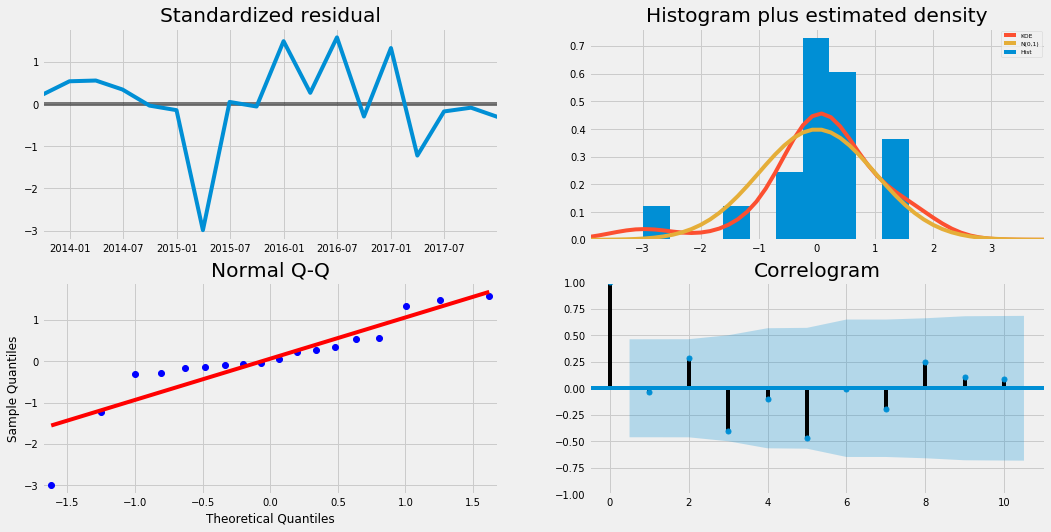

In [54]:
#investigate unusual behaviour
results.plot_diagnostics(figsize=(16,8))
plt.show()

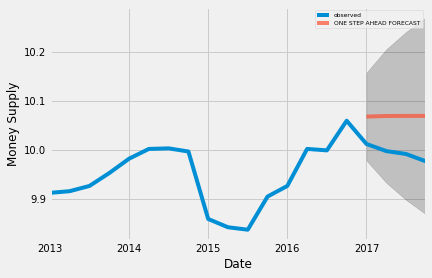

In [69]:
#validating our forecast by comparing the predicted values to the real or actual values
pred=results.get_prediction(start=pd.to_datetime('2017-03-31'),dynamic=True)
pred_ci=pred.conf_int()
b=y['MONEY SUPPLY']
ax=b['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label="ONE STEP AHEAD FORECAST", alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Money Supply')
plt.legend()
plt.show()

In [70]:
m_forecasted=pred.predicted_mean
m_truth=b['2017-03-31':]
mse=((m_forecasted-m_truth)**2).mean()
print('THE MEAN SQUARED ERROR OF OUR FORECAST IS {}'.format(round(mse,2)))

THE MEAN SQUARED ERROR OF OUR FORECAST IS 0.01


In [71]:
print('THE ROOT MEAN SQUARED ERROR OF OUR FORECAST IS {}'.format(round(np.sqrt(mse),2)))

THE ROOT MEAN SQUARED ERROR OF OUR FORECAST IS 0.08


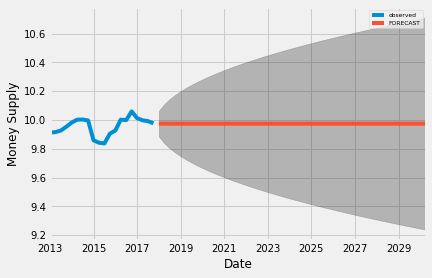

In [74]:
#producing and visualizing forecast
pred_uc= results.get_forecast(steps=50)
pred_ci=pred_uc.conf_int()
ax=b.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='FORECAST')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Money Supply')
plt.legend()
plt.show()